In [2]:
##1.Data Exploration
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\amrut\\Downloads\\Employee.csv")

# Display the first few rows
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [4]:
# List unique values and count for each column
unique_values = {col: df[col].unique() for col in df.columns}
unique_counts = df.nunique()

# Perform statistical analysis
stats = df.describe()

# Rename columns if necessary (example: renaming 'Company Name' to 'Company')
df.rename(columns={'Company Name': 'Company'}, inplace=True)

# Display results
unique_values, unique_counts, stats
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [5]:
##2.Data cleaning
#Replace 0 in Age with NaN
df.loc[df['Age'] == 0, 'Age'] = pd.NA

# Fill missing values
df['Company'].fillna('Unknown', inplace=True)
df['Place'].fillna('Unknown', inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)

# Remove duplicate rows
duplicates_removed = df.duplicated().sum()
df.drop_duplicates(inplace=True)

# Outlier Detection and Removal using IQR
Q1 = df[['Age', 'Salary']].quantile(0.25)
Q3 = df[['Age', 'Salary']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[
    (df['Age'] >= lower_bound['Age']) & (df['Age'] <= upper_bound['Age']) &
    (df['Salary'] >= lower_bound['Salary']) & (df['Salary'] <= upper_bound['Salary'])
]

# Display cleaning summary
cleaning_summary = {
    "Duplicate Rows Removed": duplicates_removed,
    "Missing Values Filled": df.isna().sum().to_dict()
}
cleaning_summary

C:\Users\amrut\AppData\Local\Temp\ipykernel_16112\382233634.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Company'].fillna('Unknown', inplace=True)
C:\Users\amrut\AppData\Local\Temp\ipykernel_16112\382233634.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

{'Duplicate Rows Removed': 4,
 'Missing Values Filled': {'Company': 0,
  'Age': 0,
  'Salary': 0,
  'Place': 0,
  'Country': 0,
  'Gender': 0}}

In [6]:
##3.Data Analysis
# Filter data where Age > 40 and Salary < 5000
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]

# Summary statistics
filtered_summary = filtered_df.describe()

filtered_summary

,Age,Salary,Gender
count,15.000000,15.000000,15.000000
mean,45.333333,3411.533333,0.066667
std,3.994043,462.651808,0.258199
min,41.000000,3000.000000,0.000000
25%,43.500000,3016.500000,0.000000
50%,44.000000,3184.000000,0.000000
75%,47.500000,4034.000000,0.000000
max,54.000000,4034.000000,1.000000


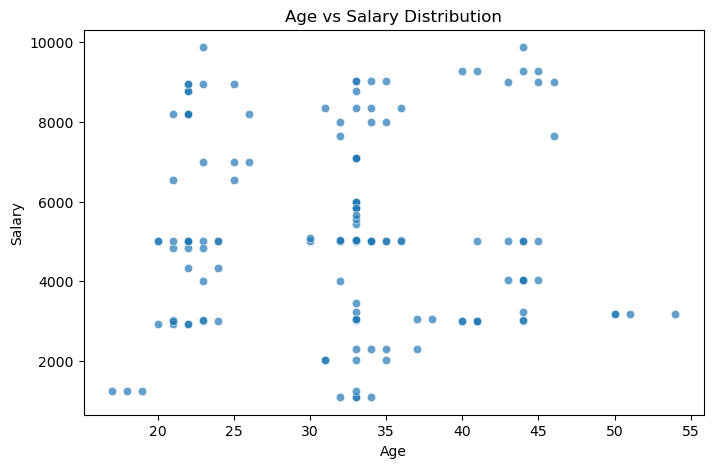

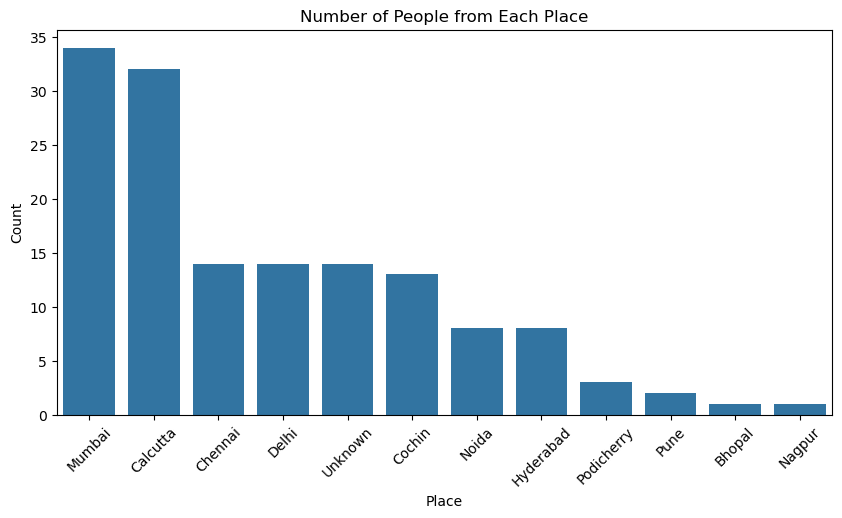

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Age vs Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Age", y="Salary", alpha=0.7)
plt.title("Age vs Salary Distribution")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

# Bar chart for number of people from each place
place_counts = df['Place'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=place_counts.index, y=place_counts.values)
plt.xticks(rotation=45)
plt.title("Number of People from Each Place")
plt.xlabel("Place")
plt.ylabel("Count")
plt.show()

In [8]:
##4.Data Encoding
# Convert categorical columns using label encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Company'] = encoder.fit_transform(df['Company'])
df['Place'] = encoder.fit_transform(df['Place'])

# Display the encoded data
df.head()

,Company,Age,Salary,Place,Country,Gender
0,4,20.0,5000.0,2,India,0
1,2,30.0,5000.0,6,India,0
2,4,35.0,2300.0,1,India,0
3,2,40.0,3000.0,4,India,0
4,4,23.0,4000.0,6,India,0


In [9]:
##5.Scaling the feqtures using standardscaler and minmaxscaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical features for scaling
numerical_features = ['Age', 'Salary']

# Apply StandardScaler
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_features] = standard_scaler.fit_transform(df[numerical_features])

# Apply MinMaxScaler
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_features] = minmax_scaler.fit_transform(df[numerical_features])

# Display first few rows after scaling
df_standard_scaled.head(), df_minmax_scaled.head()

(   Company       Age    Salary  Place Country  Gender
 0        4 -1.484676 -0.100827      2   India       0
 1        2 -0.267174 -0.100827      6   India       0
 2        4  0.341577 -1.243735      1   India       0
 3        2  0.950328 -0.947426      4   India       0
 4        4 -1.119426 -0.524127      6   India       0,
    Company       Age    Salary  Place Country  Gender
 0        4  0.081081  0.445089      2   India       0
 1        2  0.351351  0.445089      6   India       0
 2        4  0.486486  0.137817      1   India       0
 3        2  0.621622  0.217480      4   India       0
 4        4  0.162162  0.331285      6   India       0)